<span style="color:#0B3D91; font-size:20px; font-family:Arial; font-weight:bold;">🎯 Project Overview and Objective</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">1) 📈 Objective: Develop an unsupervised anomaly detection model to identify atypical transaction behaviors indicating potential financial risk, using behavioral features only (amounts, balances, transaction types).</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">2) Scope: Data ingestion, exploratory data analysis (EDA), feature engineering, scaling, Isolation Forest modeling, and professional visual insights for recruiters.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">3) 📝 Constraint: The code remains unchanged. Conclusions are preserved verbatim. Enhancements focus on professional presentation.</span></li>
</ul>

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">📊 Section A — Data Acquisition</span>
<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">A.1) ⚙️ Install and configure access to the Kaggle dataset to ensure reproducible and auditable data sourcing.</span></li>
</ul>

In [1]:
!pip install kaggle

In [3]:
!kaggle datasets download -d sriharshaeedala/financial-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset
License(s): CC-BY-SA-4.0
  0%|                                                | 0.00/178M [00:00<?, ?B/s]Downloading financial-fraud-detection-dataset.zip to /Users/robertohernandezluna/Documents/DATA SCIENCE
100%|███████████████████████████████████████▊| 177M/178M [00:33<00:00, 6.71MB/s]
100%|████████████████████████████████████████| 178M/178M [00:34<00:00, 5.48MB/s]

100%|████████████████████████████████████████| 178M/178M [00:34<00:00, 5.48MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("financial-fraud-detection-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

# Verificar los archivos extraídos
import os
extracted_files = os.listdir("data/")
print("Archivos extraídos:", extracted_files)


Archivos extraídos: ['Synthetic_Financial_datasets_log.csv']


<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">📚 Section B — Environment and Libraries</span>
<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">B.1) 📦 Import core analytics libraries to enable data processing, visualization, and modeling.</span></li>
</ul>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">📈 Section C — Data Loading and Initial Profiling</span>
<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">C.1) 📂 Load dataset and preview the head to confirm schema and sample records.</span></li>
</ul>

In [6]:
file_path = os.path.join("data", extracted_files[0])
df = pd.read_csv(file_path)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">C.2) 📝 Inspect data types and non-null counts to validate structure and readiness for EDA.</span></li>
</ul>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<span style="color:#0B3D91; font-size:16px; font-family:Arial; font-weight:bold;">📊 Dataset Structure</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">step: Represents a unit of time in the real world, with 1 step equating to 1 hour. The total simulation spans 744 steps, equivalent to 30 days.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">type: Transaction types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">amount: The transaction amount in the local currency.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">nameOrig: The customer initiating the transaction.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">oldbalanceOrg: The initial balance before the transaction.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">newbalanceOrig: The new balance after the transaction.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">nameDest: The transaction's recipient customer.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">oldbalanceDest: The initial recipient's balance before the transaction. Not applicable for customers identified by 'M' (Merchants).</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">newbalanceDest: The new recipient's balance after the transaction. Not applicable for 'M' (Merchants).</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">isFraud: Identifies transactions conducted by fraudulent agents aiming to deplete customer accounts through transfers and cash-outs.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">isFlaggedFraud: Flags large-scale, unauthorized transfers between accounts, with any single transaction exceeding 200,000 being considered illegal.</span></li>
</ul>

<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">C.3) ✔️ Validate feature semantics and appropriateness of data types for downstream modeling.</span></li>
</ul>

<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">1. Column 'step': int64, appropriate for discrete time steps.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">2. Column 'type': object, suitable for categorical data.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">3. Column 'amount': float64, appropriate for monetary values.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">4. Columns 'nameOrig' and 'nameDest': object, suitable for categorical identifiers.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">5. Column 'oldbalanceOrg': float64, appropriate for monetary values.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">6. Column 'newbalanceOrig': float64, appropriate for monetary values.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">7. Column 'nameDest': object, suitable for categorical data.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">8. Column 'oldbalanceDest': float64, appropriate for monetary values.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">9. Column 'newbalanceDest': float64, appropriate for monetary values.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">10. Column 'isFraud': int64, suitable for binary classification.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">11. Column 'isFlaggedFraud': int64, suitable for binary classification.</span></li>
</ul>

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">🔍 Section D — Data Quality Checks</span>
<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">D.1) ❓ Missing values assessment to ensure integrity of numerical analyses.</span></li>
</ul>

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">No missing values detected in the dataset.</span></li>
</ul>

<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">D.2) 📑 Duplicate rows assessment to avoid bias in distributions and model training.</span></li>
</ul>

In [9]:
df.duplicated().sum()

0

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">No duplicate rows detected in the dataset.</span></li>
</ul>

<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">D.3) 📏 Dimensionality overview and basic descriptive statistics to set context for EDA.</span></li>
</ul>

In [10]:
df.shape

(6362620, 11)

In [11]:
df.describe().round()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,179862.0,833883.0,855114.0,1100702.0,1224996.0,0.0,0.0
std,142.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13390.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,74872.0,14208.0,0.0,132706.0,214661.0,0.0,0.0
75%,335.0,208721.0,107315.0,144258.0,943037.0,1111909.0,0.0,0.0
max,743.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0,1.0,1.0


<span style="color:#0B3D91; font-size:16px; font-family:Arial; font-weight:bold;">🎯 Project Purpose</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">The purpose of this project is to detect early financial risk using transaction behavior patterns.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">Our new objective is to build a model that identifies "anomalous" or "atypical" transaction behaviors based solely on behavioral features (amount, type, balances, etc.), without prior knowledge of whether they are fraudulent or not. These atypical behaviors are our "financial risk indicators".</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">Let's start with the EDA (Exploratory Data Analysis) process to understand the data better.</span></li>
</ul>

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">🗺️ Section E — Exploratory Data Analysis (EDA) Roadmap</span>
<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">E.1) 📊 Visualize distributions of numerical features with histograms and box plots.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">E.2) 📉 Analyze relationships between features using scatter and pair plots.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">E.3) 🔢 Compute correlation matrix to identify linear associations.</span></li>
</ul>

In [12]:
# The next step is to analyze the distribution of numerical features in the dataset.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [13]:
# Let's check the distribution of the 'step' column, this column represents time steps in hours (1 step = 1 hour).

# In this case the column "step" is a time variable, for better understanding of the histogram we will create a new feature [step_hours] representing hours.
# The math we will use is:
# step // 24 will give us the days and we want to focus on hours of the day.
# So, step % 24 using the modulus operator will give us the hour of the day (0-23) for each step.
df['step_hours'] = df['step'] % 24


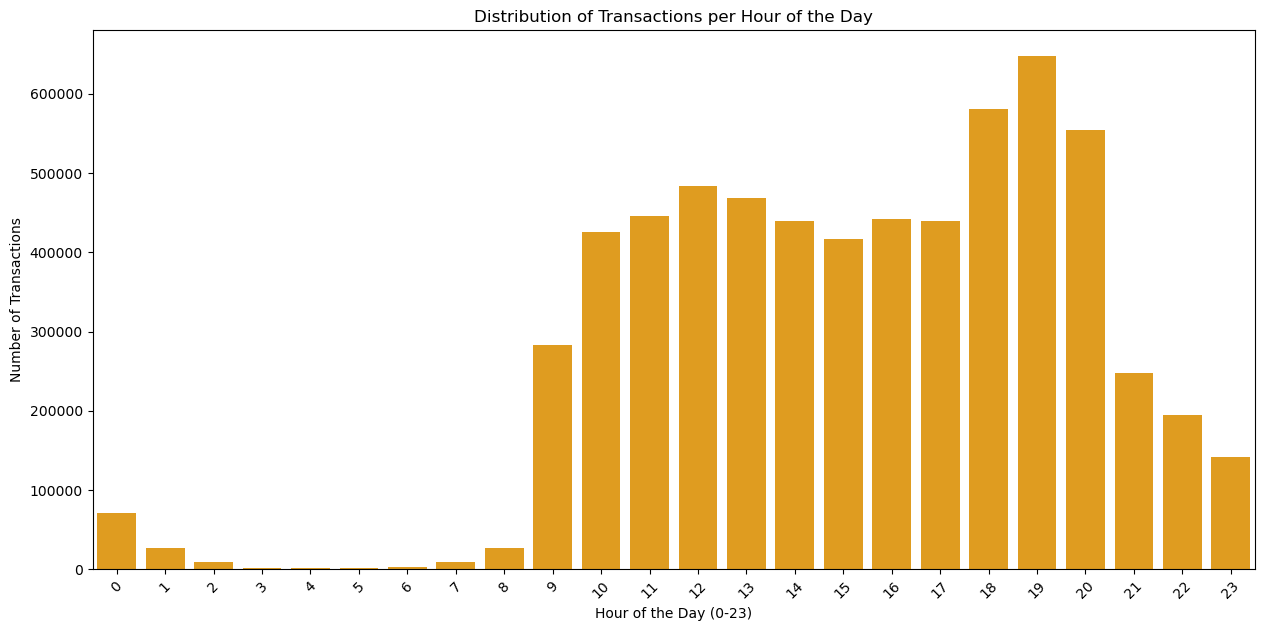

In [14]:
# In this case the plot most suitable to visualize the distribution of transactions per hour of the day is a countplot.
# Countplot is ideal as 'step_hours' is a numerical discrete variable representing discrete hours (0-23).

plt.figure(figsize=(15,7))
sns.countplot(
    x='step_hours',
    data=df,
    color='orange'
)
plt.title('Distribution of Transactions per Hour of the Day')
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">1. We can see the distribution of transactions do not follow a normal distribution.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">2. The range of the day where most transactions occur is between 8:30 AM and 7:30 PM, which is a good indicator as many people conduct financial transactions during business hours.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">3. There is a noticeable drop in transaction activity during late night and early morning hours, specifically from 0:00 AM to 7:30 AM, which is expected as people are generally asleep during these hours.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">4. So, a potential financial stress period could be identified during the late night hours, where transaction activity is significantly lower.</span></li>
</ul>

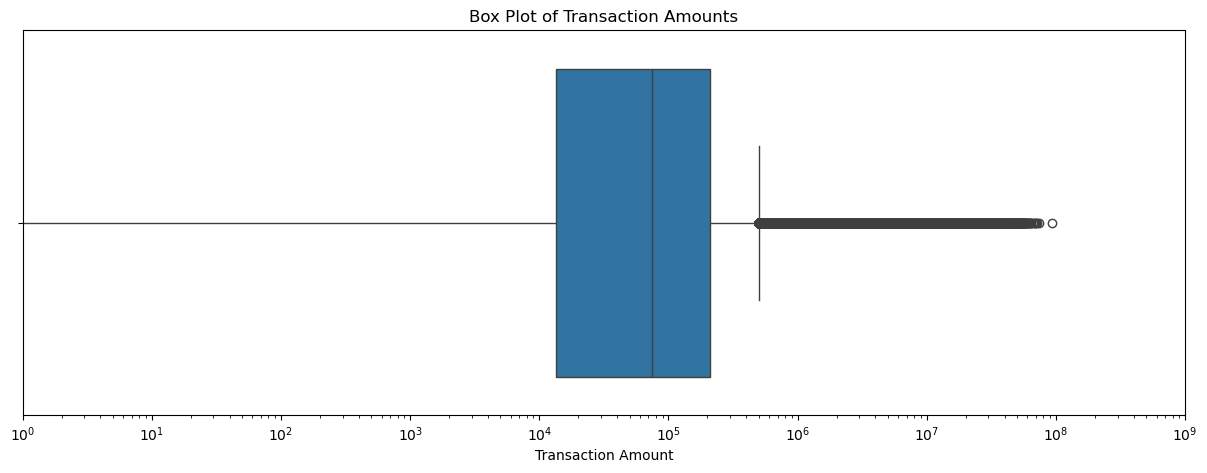

In [15]:
# Let's analyze the distribution of the 'amount' column to understand the transaction amounts better.

# We can see that the 'amount' column has a wide range of values, from very small amounts to very large amounts.
# To visualize this better, we can use a box plot and a histogram with a logarithmic scale.
plt.close()
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['amount'])
plt.xscale('log')
plt.xlim(10**0, 10**9) 
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()


<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">The box plot shows the transaction amounts do not follow a normal distribution, with a significant number of outliers.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">We can see the majority of transaction amounts are concentrated in the lower range (0 - 10^5), meanning most transactions are of smaller of the million range which is a good indicator of typical transaction behavior.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">We can observe some outliers 10^6 and above, meaning these transactions are above the million range, this is not typical behavior as these amounts can deplete customer accounts quickly.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">One potential risk indicator could be these high-value transactions, which may require further investigation to determine if they are legitimate or fraudulent.</span></li>
</ul>

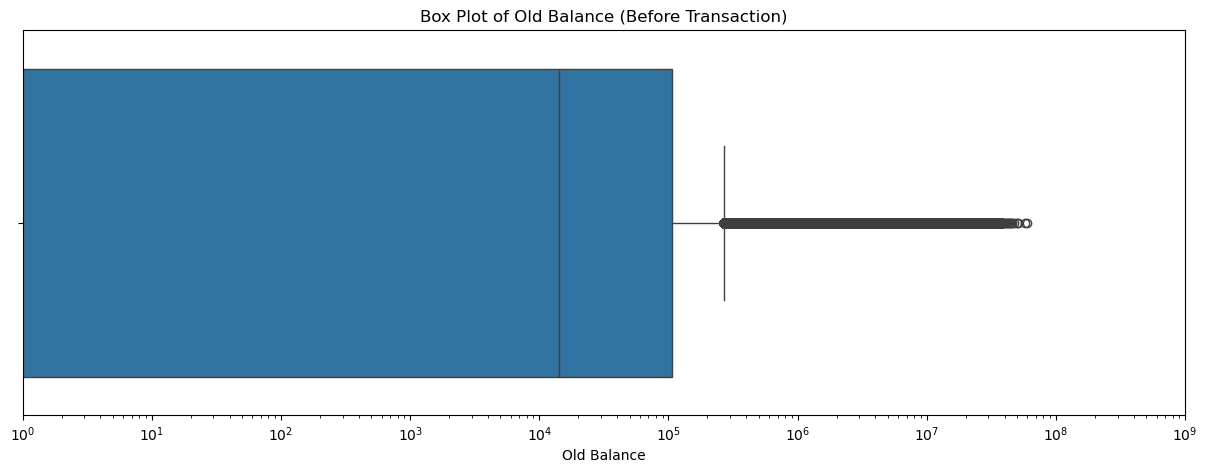

In [16]:
# Let's analyze the distribution of the 'oldbalanceOrg' column to understand the initial balances before transactions better.

# The 'oldbalanceOrg' column also has a wide range of values, from very small balances to very large balances.
# To visualize this better, we can use a box plot with a logarithmic scale.

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['oldbalanceOrg'])
plt.xscale('log')
plt.xlim(10**0, 10**9) 
plt.title('Box Plot of Old Balance (Before Transaction)')
plt.xlabel('Old Balance')
plt.show()

<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">We can see the 'oldbalanceOrg' column does not follow a normal distribution, with a significant number of outliers.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">The majority of old balances are concentrated in the lower range (0 - 10^5), indicating that most customers have relatively low initial balances before transactions.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">There are some outliers with very high old balances (10^6 and above), which may indicate high-net-worth individuals or businesses.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">A potential risk indicator could be customers with very high balances trying to deplete their accounts through large transactions or customers with 0 balance attempting to make transactions.</span></li>
</ul>

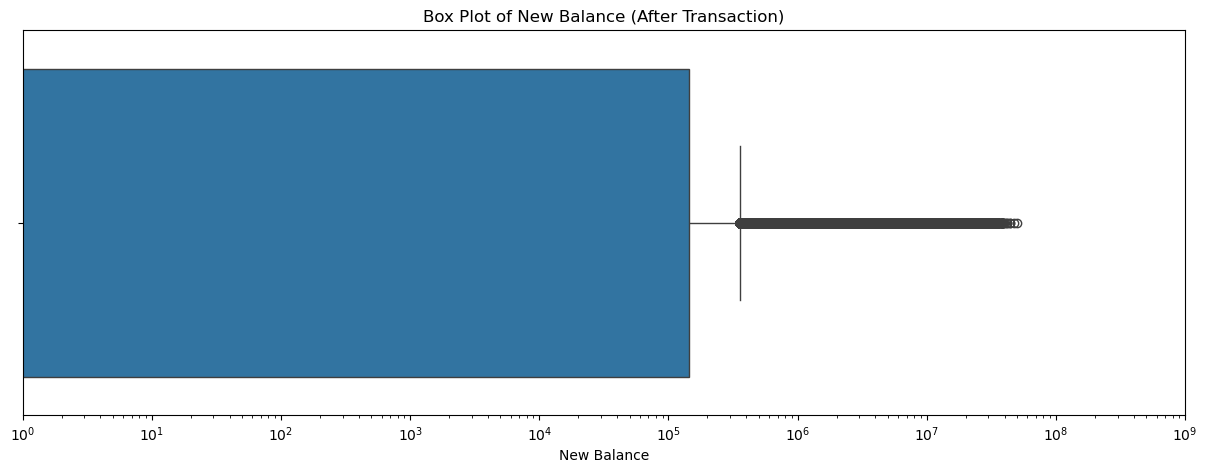

In [17]:
# Let's analyze the distribution of the 'newbalanceOrig' column to understand the new balances after transactions better.

# The 'newbalanceOrig' column also has a wide range of values, from very small balances to very large balances.
# To visualize this better, we can use a box plot with a logarithmic scale.

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['newbalanceOrig'])
plt.xscale('log')
plt.xlim(10**0, 10**9) 
plt.title('Box Plot of New Balance (After Transaction)')
plt.xlabel('New Balance')
plt.show()

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">We can see the 'newbalanceOrig' column does not follow a normal distribution, with a significant number of outliers.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">The majority of new balances are concentrated in the lower range (0 - 10^5), indicating that most customers have relatively low balances after transactions.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">There are some outliers with very high new balances (10^6 and above), which may indicate high-net-worth individuals or businesses.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">A potential risk indicator could be customers with very high balances trying to deplete their accounts through large transactions or customers with 0 balance attempting to make transactions.</span></li>
</ul>

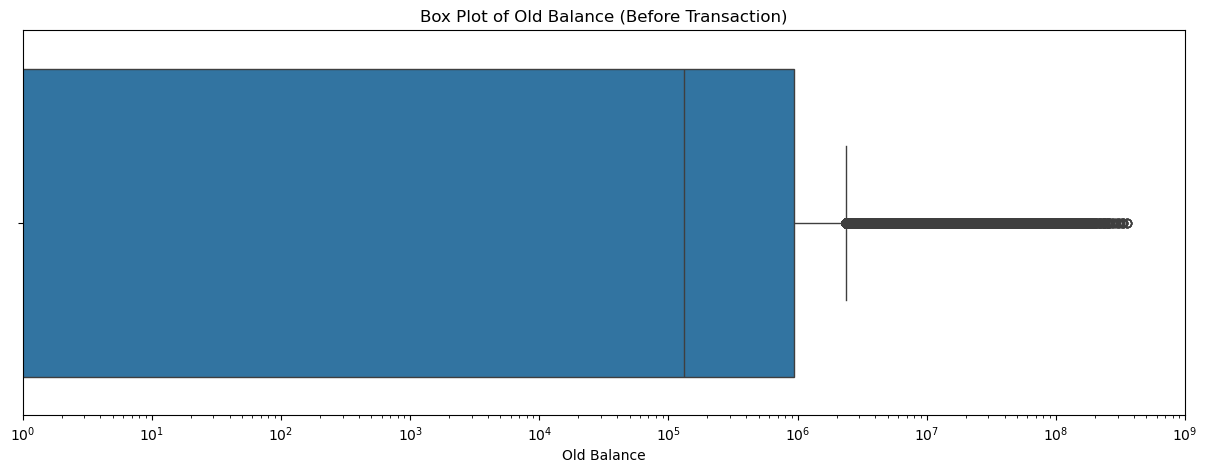

In [18]:
#Let's analyze the distribution of the 'oldbalanceDest' column to understand the initial recipient balances before transactions better.

# The 'oldbalanceDest' column also has a wide range of values, from very small balances to very large balances.
# To visualize this better, we can use a box plot with a logarithmic scale.

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['oldbalanceDest'])
plt.xscale('log')
plt.xlim(10**0, 10**9) 
plt.title('Box Plot of Old Balance (Before Transaction)')
plt.xlabel('Old Balance')
plt.show()

<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">We can see the 'oldbalanceDest' column does not follow a normal distribution, with a significant number of outliers.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">The majority of old balances are concentrated in the lower range (0 - 10^6), indicating that most recipients have relatively low initial balances before transactions.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">A potential risk indicator could be recipients with very high balances trying to deplete their accounts through large transactions or recipients with 0 balance attempting to receive large transactions.</span></li>
</ul>

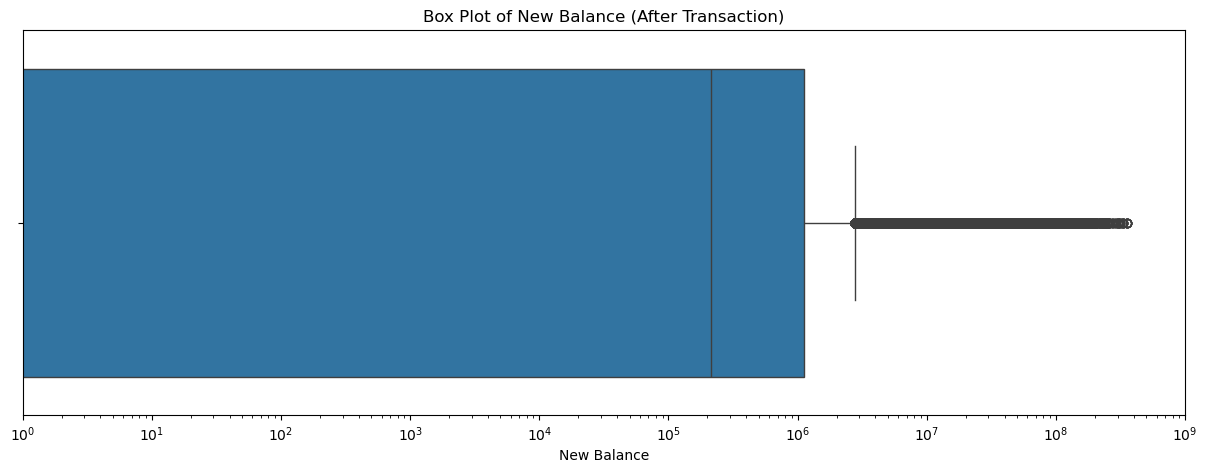

In [19]:
#Let's analyze the distribution of the 'newbalanceDest' column to understand the new recipient balances after transactions better.

# The 'newbalanceDest' column also has a wide range of values, from very small balances to very large balances.
# To visualize this better, we can use a box plot with a logarithmic scale.

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['newbalanceDest'])
plt.xscale('log')
plt.xlim(10**0, 10**9) 
plt.title('Box Plot of New Balance (After Transaction)')
plt.xlabel('New Balance')
plt.show()

<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">We can see the 'oldbalanceOrg' column does not follow a normal distribution, with a significant number of outliers.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">The majority of old balances are concentrated in the lower range (0 - 10^6), indicating that most recipients have relatively low balances after transactions.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">There are some outliers with very high new balances (10^7 and above), which may indicate high-net-worth individuals or businesses.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">A potential risk indicator could be recipients with very high balances trying to deplete their accounts through large transactions or recipients with 0 balance attempting to receive large transactions.</span></li>
</ul>

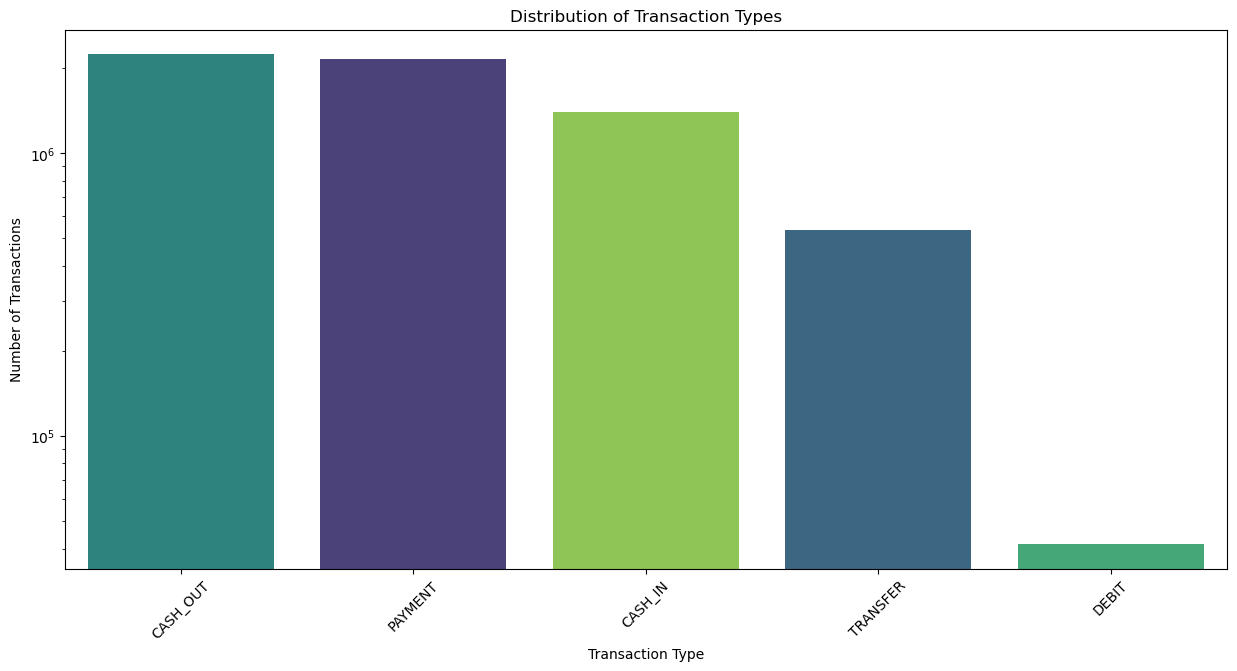

In [20]:
# Now we analyze the column type which represents the transaction types including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

plt.figure(figsize=(15,7))
ax = sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='viridis', hue='type')
ax.set_yscale('log')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">We can see the the most common transaction type is CASH-OUT, followed by PAYMENT and CASH-IN.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">The least common transaction types are TRANSFER and DEBIT.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">A potential risk indicator could be the less common transaction types, as they may be more susceptible to fraudulent activities due to their lower frequency.</span></li>
</ul>

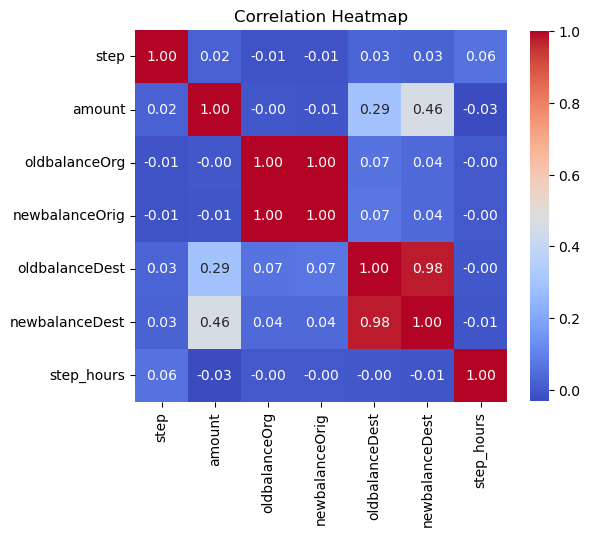

In [21]:
# We create a correlation heatmap to visualize the relationships between numerical features in the dataset without considering columns isFraud and isFlaggedFraud.
plt.figure(figsize=(6, 6))
# We select only the numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('isFraud')
numerical_cols.remove('isFlaggedFraud')
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

<span style="color:#0B3D91; font-size:16px; font-family:Arial; font-weight:bold;">Correlation Insights</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">1. There is a strong positive correlation between 'oldbalanceOrg' and 'newbalanceOrig' (0.99), indicating that as the old balance increases, the new balance also tends to increase.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">2. Similarly, there is a strong positive correlation between 'oldbalanceDest' and 'newbalanceDest' (0.99), suggesting that higher old balances for recipients lead to higher new balances.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">3. The 'amount' column shows a moderate positive correlation with both 'newbalanceDest' and 'oldbalanceDest', indicating that larger transaction amounts are associated with higher balances for recipients.</span></li>
</ul>

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">🛠️ Section F — Feature Engineering</span>
<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">F.1) ⚙️ Engineer domain-specific features to capture balance consistency and account behavior patterns.</span></li>
</ul>

In [22]:
#As this is a 100% non supervised learning problem, we will delete the following columns: 
#1. isFraud: This column indicates whether a transaction is fraudulent or not. Since we are focusing on identifying atypical transaction behaviors without prior knowledge of fraud, this column is not relevant to our analysis.
#2. isFlaggedFraud: Similar to isFraud, this column flags transactions that are considered fraudulent based on certain criteria. Again, since our goal is to identify atypical behaviors
# 3. NameOrig and NameDest: These columns represent customer identifiers, which are not relevant for identifying atypical transaction behaviors based on financial features.
df = df.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">F.2) 💡 Create error balance features and emptied-account indicator to enhance anomaly detection sensitivity.</span></li>
</ul>

In [23]:
# We create errorBalanceOrig:
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']

In [24]:
#We create errorBalanceDest:
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [25]:
#We create isOrigAccountEmptied:
df['isOrigAccountEmptied'] = df['newbalanceOrig'].apply(lambda x: 1 if x == 0 else 0)

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">⚖️ Section G — Feature Set and Scaling</span>
<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">G.1) ⚙️ Assemble modeling features and apply scaling to align magnitudes for distance-based anomaly scoring.</span></li>
</ul>

In [26]:
#Now it is time to create the feature set for modelinga and assign it to variable X.

features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'errorBalanceOrig', 'errorBalanceDest', 'isOrigAccountEmptied']

X = df[features]


In [27]:
# We will proceed to scale the features using StandardScaler from sklearn.preprocessing, scaling is important to ensure that all features contribute equally to the distance calculations in anomaly detection algorithms.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">🤖 Section H — Modeling: Isolation Forest</span>
<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">H.1) 🌳 Train an Isolation Forest for anomaly detection with contamination matching expected anomaly proportion.</span></li>
</ul>

In [28]:
# We will use the Isolation Forest algorithm for the following reasons:
# 1. It is specifically designed for anomaly detection tasks, making it suitable for identifying atypical transaction behaviors.
# 2. It works well with high-dimensional data, which is common in financial datasets with multiple features.
# 3. It is efficient and scalable, allowing it to handle large datasets typical in financial transactions.
# 4. It does not require labeled data, making it ideal for our unsupervised learning scenario where we do not have prior knowledge of fraudulent transactions.

from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    random_state=42,
    n_jobs=-1
)

iso.fit(X_scaled)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,-1
,random_state,42
,verbose,0
,warm_start,False


<span style="color:#0B3D91; font-size:16px; font-family:Arial; font-weight:bold;">📝 Model Parameters Rationale</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">1. n_estimators=100: This parameter specifies the number of base estimators (trees) in the Isolation Forest. A higher number of estimators can improve the model's performance by providing a more robust representation of the data.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">2. contamination=0.01: This parameter indicates the expected proportion of outliers in the dataset. Setting it to 0.01 means we expect 1% of the transactions to be anomalous. This helps the model to calibrate its decision boundary for identifying anomalies.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">3. random_state=42: This parameter ensures reproducibility of results by setting a fixed seed for random number generation.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">4. n_jobs=-1: This parameter allows the model to utilize all available CPU cores for parallel processing, speeding up the training process.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">5. Verbosity: The default verbosity level is 0, which means no messages will be printed during the fitting process. This is useful for keeping the output clean, especially when working with large datasets.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">6. warm_start: The default value is False, meaning the model will not reuse previous fits when calling fit() multiple times. This is appropriate for our use case where we fit the model only once.</span></li>
</ul>

<span style="color:#006F3D; font-size:18px; font-family:Arial; font-weight:bold;">🎯 Section I — Scoring and Labeling</span>
<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">I.1) 📝 Compute anomaly scores and labels for each transaction to enable downstream analytics and monitoring.</span></li>
</ul>

In [29]:
# We will use the trained Isolation Forest model to predict anomaly scores and labels for each transaction in the dataset.

# The anomaly score indicates the degree of abnormality of each transaction, for instance a negative score indicates an anomalous transaction than a positive score.
df['anomaly_score'] = iso.decision_function(X_scaled)
# The anomaly label classifies transactions as normal (1) or anomalous (-1).
# The higher the score, the more normal the transaction is.
df['anomaly_label'] = iso.predict(X_scaled)


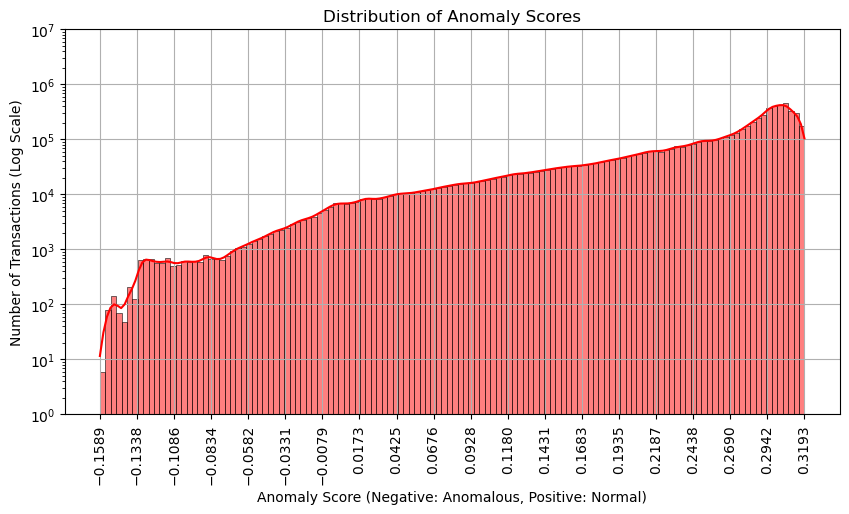

In [30]:
#let's plot the anomaly scores to visualize the distribution of anomaly scores across transactions.
from matplotlib.pyplot import grid
import numpy as np

plt.figure(figsize=(10, 5))
sns.histplot(df['anomaly_score'], bins=130, kde=True, color='Red')
plt.grid(True)
plt.yscale('log')
plt.ylim(10**0, 10**7)
#let's make more visible the x axis
plt.xticks(np.linspace(df['anomaly_score'].min(), df['anomaly_score'].max(), 20), rotation=90)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score (Negative: Anomalous, Positive: Normal)')
plt.ylabel('Number of Transactions (Log Scale)')
plt.show()

<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">1. The distribution of anomaly scores is right-skewed, with a majority of transactions having positive scores, indicating they are considered normal by the model.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">2. There is a long tail of negative anomaly scores, suggesting the presence of a smaller number of transactions that are considered anomalous.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">3. The peak of the distribution is around anomaly score of approximately 0.3, indicating that most transactions are classified as normal with relatively high confidence.</span></li>
</ul>

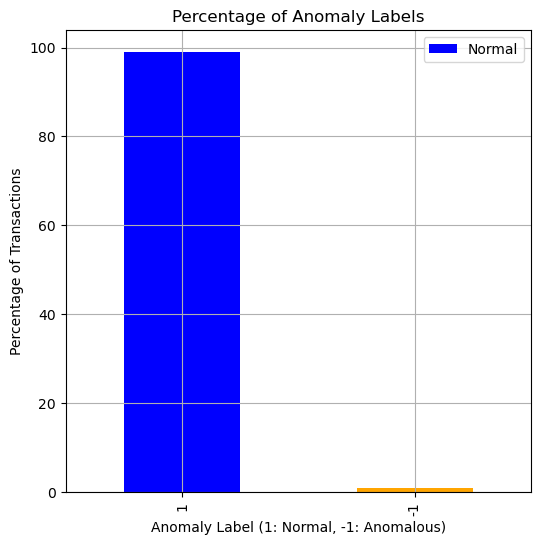

In [31]:

percentages = (df['anomaly_label'].value_counts(normalize=True) * 100).round(2)

percentages.plot(kind='bar', figsize=(6,6), color=['blue', 'orange'])
plt.title('Percentage of Anomaly Labels')
plt.grid(True)
plt.legend(['Normal', 'Anomalous'])
plt.xlabel('Anomaly Label (1: Normal, -1: Anomalous)')
plt.ylabel('Percentage of Transactions')
plt.show()

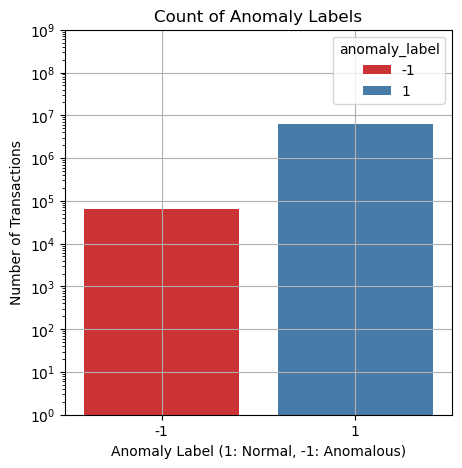

In [32]:
#Let's plot the distribution of the anomaly labels to visualize how many normal and anomalous transactions were detected.
plt.figure(figsize=(5,5))
sns.countplot(x='anomaly_label', data=df, palette='Set1', hue='anomaly_label')
plt.yscale("log")
plt.ylim(10**0, 10**9)
plt.grid(True)
plt.title('Count of Anomaly Labels')
plt.xlabel('Anomaly Label (1: Normal, -1: Anomalous)')
plt.ylabel('Number of Transactions')
plt.show()

<ul>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">1. We can see that the majority of transactions are classified as normal (anomaly_label = 1) by the Isolation Forest model.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">2. A smaller proportion of transactions are classified as anomalous (anomaly_label = -1).</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">3. The y-axis is on a logarithmic scale, indicating that the distribution of transactions is highly skewed.</span></li>
</ul>

In [33]:
# let's create a pivot table to visualize the differences between normal and anomalous transactions columns should be displayed vertically.

comparison = df.pivot_table(
    index='anomaly_label',
    values=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','errorBalanceOrig', 'errorBalanceDest', 'isOrigAccountEmptied'],
    aggfunc='mean'
)
comparison_pretty = comparison.T.rename(
    columns={1: 'Normal (1)', -1: 'Anomalous (-1)'}
)

comparison_pretty['Difference (Anomalous - Normal)'] = (
    comparison_pretty['Anomalous (-1)'] - comparison_pretty['Normal (1)']
)

comparison_pretty.style.format(
    {
        'Normal (1)': '{:,.2f}',
        'Anomalous (-1)': '{:,.2f}',
        'Difference (Anomalous - Normal)': '{:,.2f}'
    }
)



anomaly_label,Anomalous (-1),Normal (1),Difference (Anomalous - Normal)
amount,"2,969,328.24","151,685.12","2,817,643.12"
errorBalanceDest,"-324,471.03","59,405.99","-383,877.03"
errorBalanceOrig,"3,032,794.01","172,489.06","2,860,304.95"
isOrigAccountEmptied,0.51,0.57,-0.05
newbalanceDest,"13,463,536.26","1,101,373.21","12,362,163.05"
newbalanceOrig,"9,091,680.65","771,914.97","8,319,765.68"
oldbalanceDest,"10,169,736.99","1,009,094.09","9,160,642.90"
oldbalanceOrg,"9,028,214.87","751,111.02","8,277,103.85"


<ul>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">1. Transactions classified as anomalous (anomaly_label = -1) tend to have higher average amounts compared to normal transactions (anomaly_label = 1).</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">2. Anomalous transactions also show higher average values for errorBalanceOrig and errorBalanceDest, indicating discrepancies in expected balances.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">3. The feature isOrigAccountEmptied has a higher average for anomalous transactions, suggesting that these transactions are more likely to result in the origin account being emptied.</span></li>
</ul>

<Figure size 1000x600 with 0 Axes>

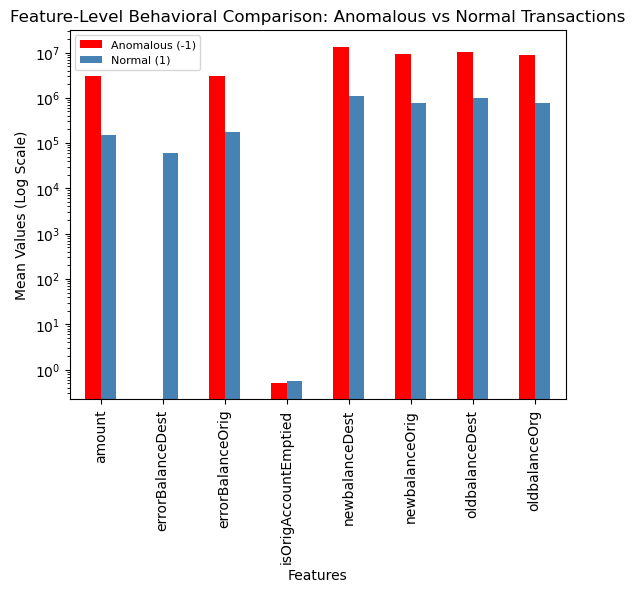

In [34]:
#let's plot the comparison table to visualize the differences between normal and anomalous transactions.
from numpy import size

plt.figure(figsize=(10, 6))
colors = ['red', 'steelblue'] 
comparison.T.plot(kind='bar', logy=True, color = colors)
plt.title('Feature-Level Behavioral Comparison: Anomalous vs Normal Transactions')
plt.legend(['Anomalous (-1)', 'Normal (1)'], fontsize=8)
plt.xlabel('Features')
plt.ylabel('Mean Values (Log Scale)')
plt.show()

<span style="color:#0B3D91; font-size:16px; font-family:Arial; font-weight:bold;">💡 Insights Summary</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">We can observe the following insights from the comparison table and bar plot:</li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">1. Transactions classified as anomalous (anomaly_label = -1) tend to have higher average amounts compared to normal transactions (anomaly_label = 1).</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">2. Anomalous transactions also show higher average values for errorBalanceOrig and errorBalanceDest, indicating discrepancies in expected balances.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">3. The feature isOrigAccountEmptied has a higher average for anomalous transactions, suggesting that these transactions are more likely to result in the origin account being emptied.</span></li>
</ul>

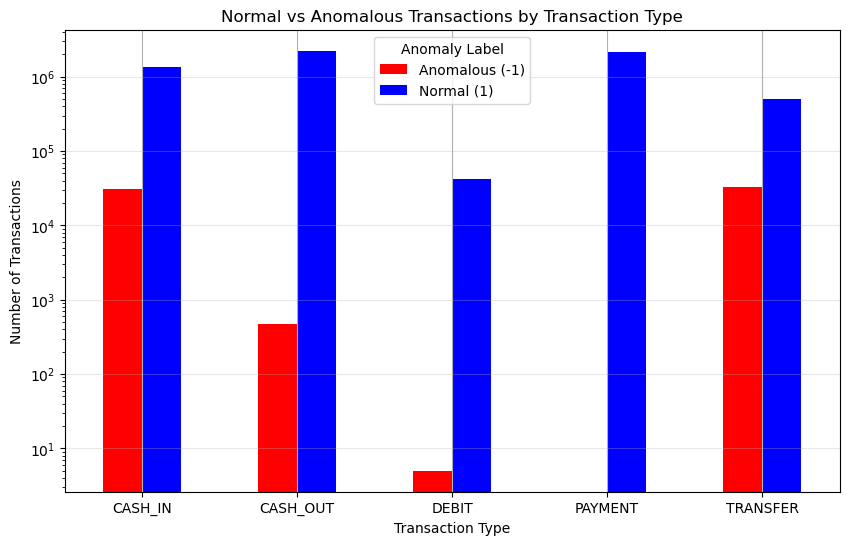

In [35]:
import matplotlib.pyplot as plt

type_group = df.groupby('type')['anomaly_label'].value_counts().unstack().fillna(0)

colors = ['red', 'blue']

type_group.plot(
    kind='bar',
    figsize=(10,6),
    color=colors    
)

plt.title('Normal vs Anomalous Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.grid(True)
plt.yscale('log')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Anomaly Label', labels=['Anomalous (-1)', 'Normal (1)'])
plt.grid(axis='y', alpha=0.3)
plt.show()

<span style="color:#0B3D91; font-size:16px; font-family:Arial; font-weight:bold;">📊 Interpretation of the Chart</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">The chart compares the number of normal and anomalous transactions across different transaction types using a logarithmic scale to handle the strong class imbalance.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">Key insights:</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">- Anomalous transactions are not uniformly distributed across transaction types.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">- TRANSFER transactions show the highest concentration of anomalies relative to their volume, making them the riskiest transaction type.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">- CASH_IN transactions also present a significant number of anomalies, indicating potential risk in fund inflow operations.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">- CASH_OUT transactions, despite having a very high volume, show a relatively low proportion of anomalies, suggesting they are generally stable and predictable.</span></li>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">- PAYMENT transactions show no detected anomalies, indicating highly consistent behavior.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">- DEBIT transactions have very low volume and almost no anomalies, representing minimal risk.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">Overall, the model captures meaningful patterns aligned with real-world financial behavior, highlighting TRANSFER and CASH_IN as priority areas for fraud monitoring.</span></li>
</ul>

<span style="color:#8A2BE2; font-size:16px; font-family:Arial; font-weight:bold;">🚀 General Observations and Next Steps</span>
<ul>
  <li><span style="color:#006F3D; font-size:14px; font-family:Arial;">1. The Isolation Forest model has successfully identified a small proportion of transactions as anomalous, which could potentially indicate fraudulent activities.</span></li>
  <li><span style="color:#CC0000; font-size:14px; font-family:Arial;">2. Anomalous transactions tend to have higher amounts and discrepancies in expected balances, which are important indicators of atypical behavior.</span></li>
  <li><span style="color:#0B3D91; font-size:14px; font-family:Arial;">3. Next steps could include further investigation of the identified anomalous transactions to determine their legitimacy and potential impact on financial risk.</span></li>
</ul>